<a href="https://colab.research.google.com/github/jp7252/ML4RM/blob/main/Class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression

- Linear regression is a basic supervised machine learning method that aims to uncover the relationship between continuous variables:
  - One or more **explanatory/independent/input** variables: $X_1, X_2,...X_p$
  - The **response/dependent/output** variable Y
  - Example: you have a dataset of house sizes and prices. Given a new house's size, predict its price.

### Simple Linear Regression
**Simple linear regression** is a special case when there is only one explanatory variable $X$. In this case, the relation can be represented quantitatively by:
$$
Y = \beta_0 + \beta_1X + \epsilon
$$

- $\beta_0$ and $\beta_1$ are two **unknown** constants that represent the intercept and slope.
- $\epsilon$ is called the error term.  This represents the deviation of the value from the linearity.

- Below we visualize our simple linear model with an example $Y = 1 + 0.5 X + \epsilon$.  ($\beta_0 = 1$ and $\beta_1=0.5)$

- $\beta_0$ and $\beta_1$ defines the linear relation. This means that if we observe a set of n independent variables $X = (x_1, x_2, ..., x_n)$:

In [ ]:
print(1+1)

2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

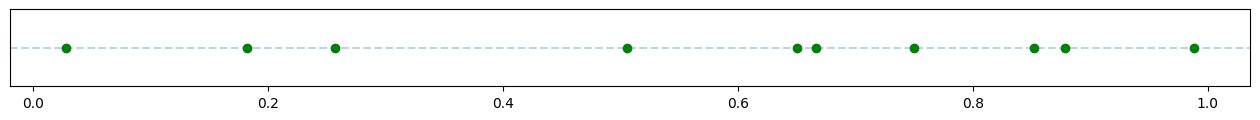

In [ ]:
# Using a random seed to make sure that we get the same result each time
np.random.seed(18)
N = 10
X = np.random.rand(N)

plt.figure(figsize=(16, 1))
plt.scatter(X, np.zeros(N), color='green')
plt.yticks([])
plt.ylim(-0.2, 0.2)
plt.axhline(y=0, alpha=0.3, ls='dashed')
plt.show()

- The linear relation $Y = 1 + 0.5X$ indicates that the outcome $Y = (y_1, y_2, ..., y_n)$ should be:

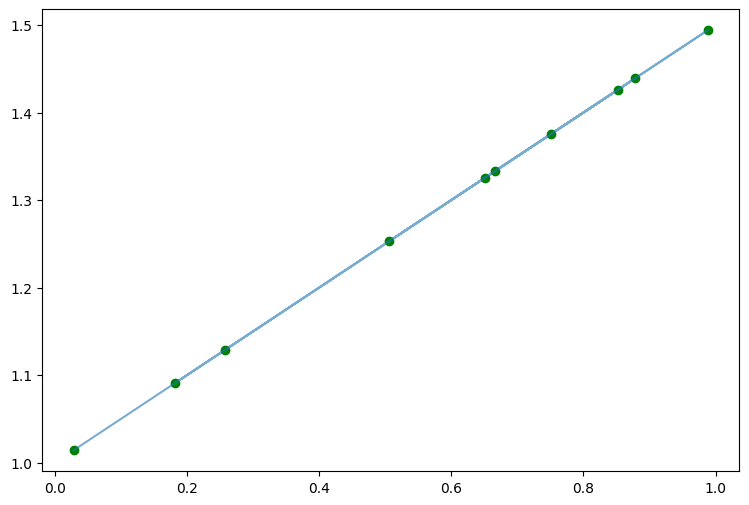

In [ ]:
beta_0 = 1
beta_1 = 0.5
Y = beta_1*X + beta_0

figure = plt.figure(figsize=(9, 6))
plt.plot(X, beta_1 * X + beta_0, figure=figure, alpha=0.6)
plt.scatter(X, Y, figure=figure, color='green')
plt.show()

- Note that there is **NO** randomness involved yet. All the randomness are attributed to $ \epsilon $. The relation $Y = 1 + 0.5X + \epsilon$ becomes

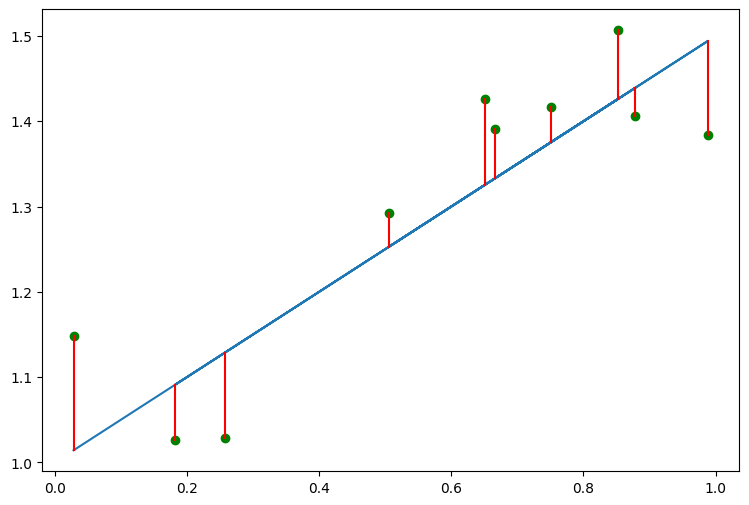

In [ ]:
# Initialize random errors that follow the normal distribution
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error
figure = plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, beta_0 + beta_1*X)
for i in range(N):
    plt.plot([X[i], X[i]], [beta_0+beta_1*X[i], Y[i]], color='red')
plt.show()

### Multiple Linear Regression
- We want to model output Y as a linear combination of our input variables X
  - $y = \hat{\beta_0} + \sum_{i=1}^p\hat{\beta_i}x_i $
  - The $\hat{}$ symbol denotes an estimated value based on the given samples. The coefficients are called the ordinary least square estimator (OLS).
  - $\hat{\beta_0}$ is known as the intercept coefficient
  - $\hat{\beta_i}, 1\leq i \leq p$ are known as the slope coefficients
  - Once we have the estimators and a newly observed X, the Y can be predicted by passing X into the formula above.

- If we include a constant 1 in $X$ and use the notation:
  - $\hat{\beta} = (\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2} ..., \hat{\beta_p})^T$
  - $X = (1, X_1, X_2,..., X_p)$
-  Then we can write the model in a simple matrix form:
  - $\hat{Y}=X\hat{\beta}$

### How do we estimate the coefficients?

- Essentially what we do is to try all the possible pairs of $\beta$ coefficients and find the ones defining the linear model most similar to the observations
- How different is the model from observations?
  - We may consider the difference between the observation and model predicted values:
  - $e = y - X\hat{\beta}$ The difference is called the **residual**

- We then start trying out some pair of $( \hat{\beta}_0, \hat{\beta}_1) \text{ , say, } (0.5, 1)$.

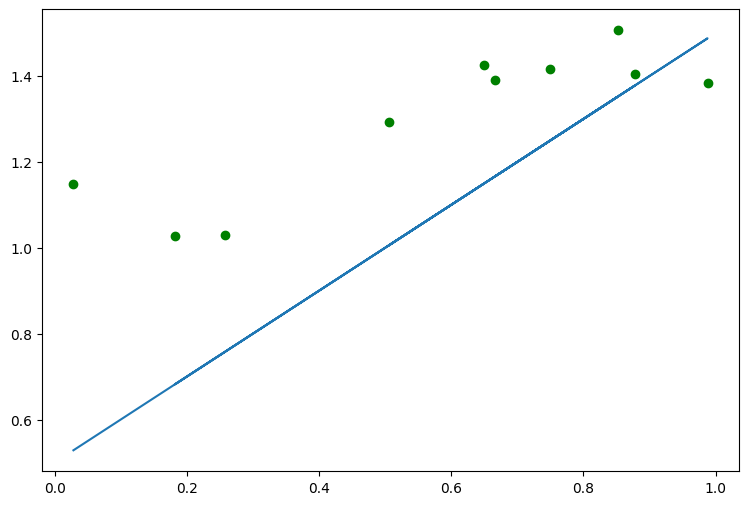

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
plt.show()

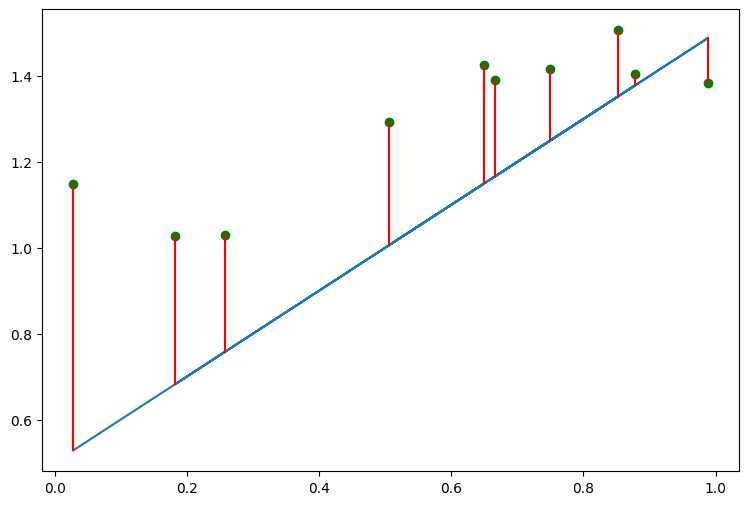

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
for i in range(N):
    plt.plot([X[i], X[i]], [0.5+X[i], Y[i]], color='red')
plt.show()

- To quantify the difference between the model and the observations, we can use the **residual sum of squares** or **RSS**. It is defined by:
  - $RSS(\hat{\beta}) = e_1^2 + e_2^2 + e_3^2 + ....e_n^2$ here n represents the number of observations in the dataset
  - Question: why do we want to take the square of the residual?
  -  We can also transform it to matrix format $RSS(\hat{\beta}) = (y-X\hat{\beta})^T(y-X\hat{\beta})$

- Therefore RSS depends on ( $\hat{\beta_0}$, $\hat{\beta_1}$).
- Below we see that indeed the model with least RSS is most similar to the observations.

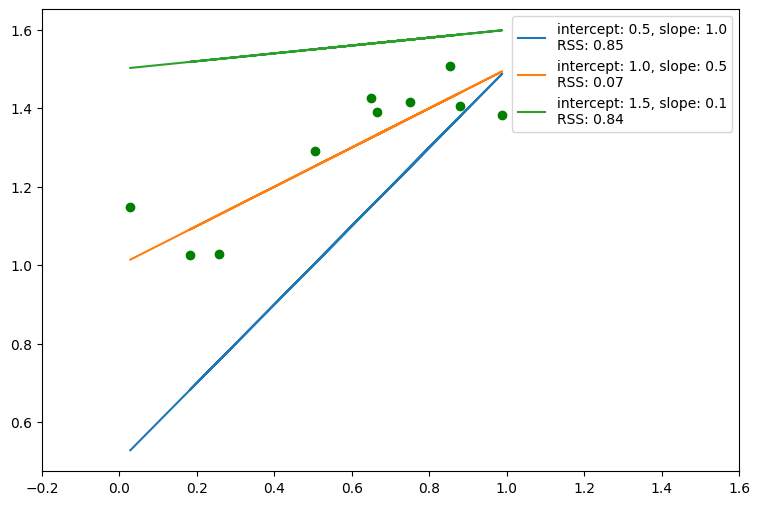

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')

plt.xlim(-0.2, 1.6)

for b0, b1 in [(0.5, 1), (1, 0.5), (1.5, 0.1)]:
    res = Y - (b0 + b1 * X)
    text = 'intercept: %.1f, slope: %.1f\nRSS: %.2f' %(b0, b1, np.sum(res**2))
    plt.plot(X, b0 + b1 * X, label=text)

plt.legend()
plt.show()

### Ordinary Least Squares

- The RSS is a quadratic function with $p+1$ parameters so a common solution is to differentiate RSS w.r.t $\hat{\beta}$ and set the derivative to zero.
  - $RSS(\hat{\beta}) = (y-X\hat{\beta})^T(y-X\hat{\beta})$
  - $\frac{\partial RSS}{\partial \hat{\beta}} = -2X^T(y-X\hat{\beta})$
  - Assume that $X$ is of full column rank, and thus that $X^TX$ is positive definite. We can then set the first derivative equal to 0 as follows:
  $$\frac{\partial RSS}{\partial \hat{\beta}} = -2X^T(y-X\hat{\beta})\stackrel{!}{=}0 \\
  \Rightarrow X^T(y-X\hat{\beta}) = 0\\
  \Rightarrow X^Ty = X^TX\hat{\beta}\\
  \Rightarrow \hat{\beta} = (X^TX)^{-1}X^Ty$$

- Note: when two or more input variables are highly correlated with each
other, then $X^TX$ is close to be singular and the solution will be unstable -
any tiny fluctuations of data will cause huge changes in the model. The
estimation errors of $\beta$ will be large.
- We can use the `numpy.linalg.pinv` function to calculate the pseudo-inverse of the matrix, which solves the problem of singular matix not having the inverse.

### Build the first regression model

- We will be using a simple diabetes dataset from scikit-learn package. You can find the data dictionary from [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [ ]:
from sklearn import datasets
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
X.shape

(442, 10)

In [ ]:
y.shape

(442,)

In [ ]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [ ]:
y[0]

151.0

In [ ]:
?np.insert

In [ ]:
import numpy as np
X1 = np.insert(X, 0, 1, axis=1)
X1.shape

(442, 11)

In [ ]:
import numpy as np

# Insert constant ones for bias weights
X1 = np.insert(X, 0, 1, axis=1)
# The @ symbol is a syntax sugar to multiply two matrices
weights = np.linalg.pinv(X1.T @ X1) @ X1.T @ y
weights

array([ 152.13348416,  -10.0098663 , -239.81564367,  519.84592005,
        324.3846455 , -792.17563855,  476.73902101,  101.04326794,
        177.06323767,  751.27369956,   67.62669218])

- Now we have the weights calculated by OLS. Let's compare the results with the weights that generated from the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) package

In [ ]:
from sklearn import linear_model
l_regression = linear_model.LinearRegression()
l_regression.fit(X, y)

LinearRegression()

In [ ]:
# Check the beta coefficients
l_regression.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [ ]:
# Check the intercept
l_regression.intercept_

152.13348416289597

### Interpreting the weights
- Linear model is useful for its interpretability that explains how each feature is contributing to the output variable.
- For example, $\beta_i$ means one unit increase of that variable will lead to $\beta_i$ difference in the target variable.
  - Note that the difference could be positive or negative.

In [ ]:
print(diabetes.feature_names)
print(l_regression.coef_)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


### Evaluate model performance

- The default score to measure the performance of the model is $R^2$, which is defined as $1-\frac{RSS}{TSS}$
  - $TSS$ is the total sum of squares, which measures the total variance of the output data y
  - $TSS=\sum_{i=1}^n(y_i-\bar{y})^2$
- $R^2$ always lies between 0 and 1
  - $R^2 =1$ indicates that the regression line perfectly fits the data
  - $R^2 = 0$ indicates that the line does not fit the data at all
- A common approach is to split the dataset into training and testing. We then train the model only use the training set and evaluate it on the test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [ ]:
l_regression.fit(X_train, y_train)

LinearRegression()

- Here we can see that the model shows a slightly higher score on the training set than the testing set.

In [ ]:
l_regression.score(X_train, y_train)

0.5244124363545944

In [ ]:
l_regression.score(X_test, y_test)

0.4772897164322617

### Linear regression assumptions

- In order to perform linear regression, you have a four assumptions that the data needs to follow. However, it is not always the case in real life.
- Consider the dataset below and think about what assumption it is violating?

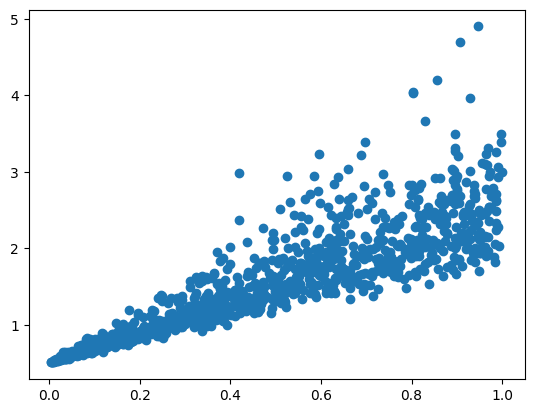

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Using a random seed to make sure that we get the same result each time
np.random.seed(42)
N = 1000
X = np.random.rand(N)

b0 = 0.5
b1 = 1

# Initialize random errors that follow the log-normal distribution
error = np.random.lognormal(0, 0.5, N) * X
y = b0 + b1*X + error
plt.scatter(X, y)

- By looking at the histogram of the response variable y, we can tell that it has a long-tail distribution, which is very common in real-world for any money related data such as salary, amount spent, etc.

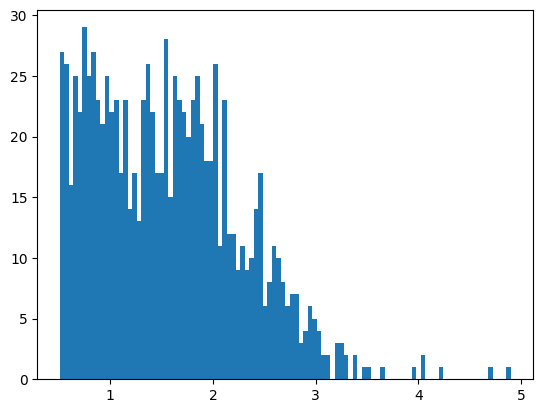

In [ ]:
plt.hist(y, bins=100);

- By taking the log transformation, the data set will become normally distributed (close enough) so that the regression residuals become normally-distributed.
- Taking the log is not the only option. You can take a look at box-cox transformation [here](https://www.geeksforgeeks.org/box-cox-transformation-using-python/) to see how to perform it using scipy. In practice, the difference is usually minimal.



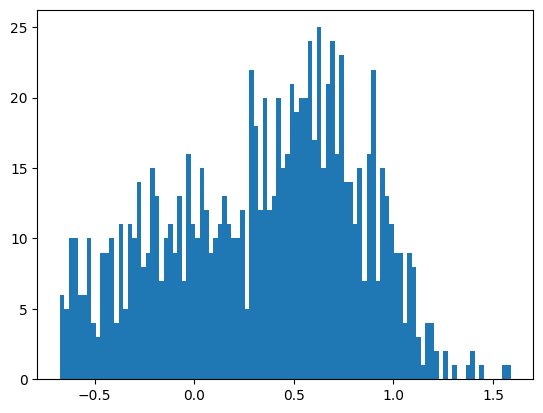

In [ ]:
plt.hist(np.log(y), bins=100);

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = X.reshape(-1, 1)
lm.fit(X, y)
lm.score(X, y)

0.7633773955138855

In [ ]:
lm.fit(X, np.log(y))
lm.score(X, np.log(y))

0.8380135367916435

In [ ]:
import numpy as np
np.random.seed(2024)

[np.random.randint(1, 10) for i in range(10)]

[9, 1, 1, 5, 8, 2, 4, 3, 1, 6]

### K-nearest neighbours
- KNN uses the label (classification)/value (regression) to make a decision of a new point. It cares about the distance between the point and its neighbours.
- There are multiple choices of distances you can pick from when deciding which of the neighbours are the nearest. You can find a list of distance functions from [here](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) .

In [ ]:
import math

def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)

In [ ]:
euclidean_distance([0,3], [4,0])

5.0

In [ ]:
euclidean_distance([1,2,3,7], [4,5,6,8])

5.291502622129181

- Once we found the nearest neighbours, we would like to do a majority vote among the neighbours.

In [ ]:
import numpy as np

def vote(neighbor_labels):
    """ Return the most common class among the neighbor samples """
    counts = np.bincount(neighbor_labels.astype('int'))
    return counts.argmax()

In [ ]:
vote(np.array([0, 7, 7, 3, 2, 1]))

7

In [ ]:
vote(np.array([2,1,2,1,2,1,2,1,2,1]))

1

- Combining everything we have built so far, we can make a basic version of KNN.

In [ ]:
def predict(X_test, X_train, y_train, k):
    y_pred = np.empty(X_test.shape[0])
    # Determine the class of each sample
    for i, test_sample in enumerate(X_test):
        # Sort the training samples by their distance to the test sample and get the K nearest
        idx = np.argsort([euclidean_distance(test_sample, x) for x in X_train])[:k]
        # Extract the labels of the K nearest neighboring training samples
        k_nearest_neighbors = np.array([y_train[i] for i in idx])
        # Label sample as the most common class label
        y_pred[i] = vote(k_nearest_neighbors)

    return y_pred

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_pred = predict(X_test, X_train, y_train, 5)

In [ ]:
y_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 2., 2.,
       1., 1., 2., 0., 1., 0., 2., 2., 1., 1., 2., 0., 0., 0., 0., 2., 0.,
       0., 2., 2., 0., 0., 0., 1., 2., 2., 0., 0.])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
sum(y_pred == y_test) / len(y_pred)

0.8

- Let's try building the model using the scikit-learn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7777777777777778

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0,  8,  5],
       [ 0,  4,  9]])